# Decision Tree Tutorial


A decision tree is a logic structure composed of connected nodes. Data enters at the root of the tree, and logical decisions are made about that data at each node. They're a simple, general concept easy to grasp which is a benefit for operational use.

Therefore, by making our way down the decision tree, we can apply classifiers to data. In the diagram below, the input data are "job offers," and we are classifying each offer as "decline" or "accept."

<img src="https://i0.wp.com/dataaspirant.com/wp-content/uploads/2017/01/B03905_05_01-compressor.png?resize=768%2C424&ssl=1">

Everything starts at the top of the decision tree from the **root node**.
* Each of the internal **decision nodes** asks a question about the data, and determines which branch to continue down. Notice that all decisions must result in a logical "yes" or "no."
  *  Ex. Instead of asking how long a commute time is, ask if it was over 1 hour
* Each **branch** line denotes the outcome of a test (yes/no)
* Finally, the data reaches an end, or a **leaf node**, which contains a classification label.

Another thing you may notice is that while all data must pass through the root node, only a fraction will end up passing through decisions further down the tree. For this reason, it is best to have the more "determinative" nodes higher in the tree, where more data will pass through.

This is particularly important for trees generated by machine learning, where some paths may lead to innaccurate classifications. A good algorithm for generating decision trees will order nodes on tree based confidence. If it is found that a node can accurately divide a large portion of the training data, that node should be placed close to the root.

In the following sections, we will take a look at some other important considerations for generating decision trees with machine learning.

## Important Parameters for Decision Tree

* Feature selection
* Maximum depth
* Minimum sample leafs

### Feature Selection Methods
---

Feature selection methods determine which feature to consider, or "ask a question about," at each node. The goal is to chose the feature that will best divide the data at a given point in the tree.

Two common methods for this are the **Gini Index** and **Entropy.** In practice, you can try both methods and see which performs better!
<br></br>

#### Gini Index
The definition for the **Gini Index** is as follows:

$$Gini = 1-\sum_{i=1}^{C}(p_{i})^2$$

Where $p_{i}$ is the probability of class i, and C is the total number of classes.

This is calculated for each possible branch (or "question" you are thinking of "asking"). To calculate Gini, we square the probability of each class outcome on this branch, and subtract the total from 1. The branch with the smallest Gini value should be chosen.

Generally speaking, the Gini Index will favor larger partitions of data.
<br></br>

#### Entropy
The definition of **Entropy** is as follows:

$$Entropy = \sum_{i=1}^{C}-p_{i}*\log_{2}(p_{i})$$

Where $p_{i}$ is the probability of class i, and C is the total number of classes.

As with Gini, the Entropy value is calculated for each possible branch, and the lowest value is chosen.

Compared to Gini, Entropy will favor smaller splits with many unique values.
<br></br>

*If you want a more in-depth look at the entropy/gini calculations, the link below steps through some examples:*

http://www.learnbymarketing.com/481/decision-tree-flavors-gini-info-gain/

### Maximum Depth
---

The depth of the tree is the distance of a node from the root. The maximum depth is simply the depth of the node that is furthest from the root. The furthest node will always be a leaf node.

<img src="https://i.stack.imgur.com/RHEqu.png">  

When generating a tree, most algorithms will allow you to set a maximum depth⁠—and you should! If you do not, the questions may become very specific to the training data, leading to overfit.

**Overfitting** is when a machine learning algorithm has become too specific to the training set. For example, a decision tree could have so many nodes that each piece of data in the training set will end at a different leaf. Unless each new datum is identical to one in the training set, such a tree would have innacurate results. While not always to this extreme, decision trees have a tendancy to overfit because of the granular nature of decision nodes.

By setting a maximum depth, we force the tree to look for more general questions, since each node will have to take on a greater share of determinations. This approach will be more robust to new test data.

### Minimum Sample Leafs
---

Similar to maximum depth, the main goal for this parameter is to prevent overfitting.

The number of **samples** for a given leaf is the number of individual data that reached the leaf in training. In an overfitted tree, some leafs may be specific to only a few pieces of training data. We have low confidence that these leafs will be accurate for new test data. By setting a number for minimum samples, we can remove leafs that suffer from overfitting.

## Random Forests

Another approach to reducing overfit is to introduce **randomness**. This means weighting certain decision nodes more or less than what the training set alone would suggest.

A single tree generated with randomness is likely to have a few nodes that are very inaccurate. However, it is also less likely to be overfitted to the training data. In order to balance out the worst offenders from randomizing, a good practice is to generate multiple random trees and average the results. The group of random trees is called a **random forest.**

<img src="https://miro.medium.com/max/1400/1*58f1CZ8M4il0OZYg2oRN4w.png">

New input is run down all the trees and then combined by some method. This method could be a simple majority vote, an average probability, or some other solution.

# Example Decision Tree

In [1]:
!pip install graphviz

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

### Loading and Splitting Data

In [3]:
path = 'diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(path, names=names)

# Dropping NaN rows
invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)
data.head()

# Splitting data
X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

/var/folders/vc/mdmsf6590w55h9b5f6c6fr_00000gn/T/ipykernel_40847/631765424.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].replace(to_replace=0, value=np.nan, inplace=True)


### Creating Model

Notice the use of the "criterion" argument to set the feature selection method to "entropy." "gini" is another option for this argument. We are also setting the maximum depth and minimum sample leafs both to 5.

In [4]:
# Creating a model with sklearn's decision DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=5, min_samples_leaf=5)  # minimum sample leafs is the minimum sample 
                                                                # amount the leaf can have

# Training/fitting the model with training data
decision_tree.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Evaluating Model

In [5]:
# Printing accuracy of testing & training data
y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  84.8
Validation Accuracy is  77.77777777777779


### Using graphiz to visualize tree

**graphviz** is a python package specifically designed to visualize graphs. Here we are using the mathematical definition of "graph," which is a structure of vertices connected with edges. It turns out that the node and branch structure of a tree is a type of graph!

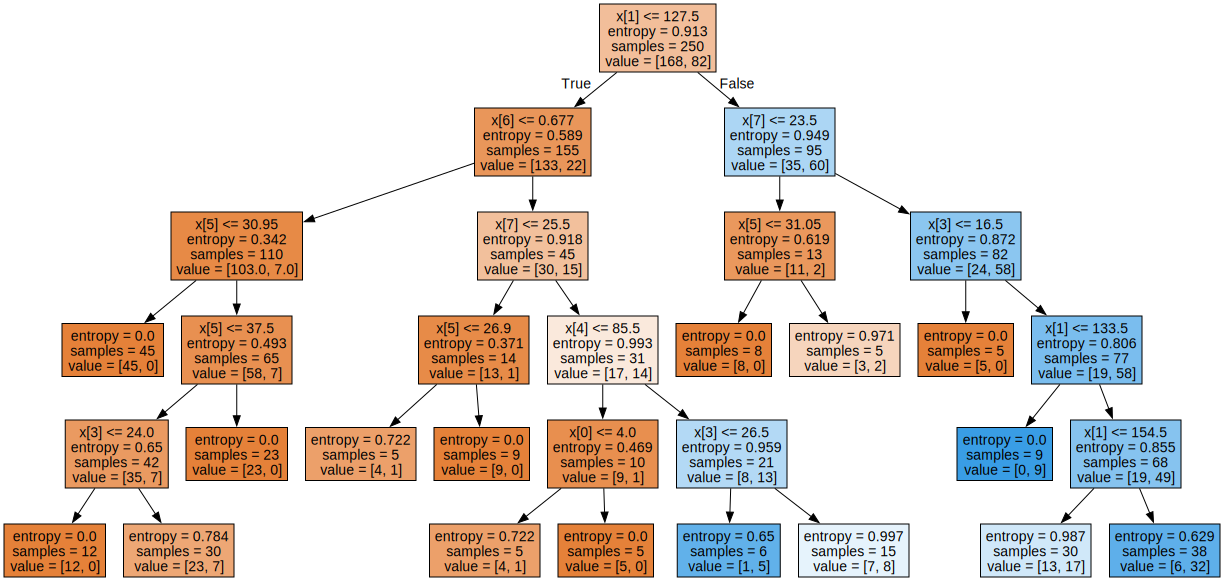

In [9]:
dot_data = tree.export_graphviz(decision_tree, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

# Example Random Forest

### Creating the Model

Although not shown here, the normal DecisionTree parameters can also be applied here.

In [10]:
# Creating a model w sklearn's RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)

# Training/fitting the model with training data
random_forest.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Evaluating the Model

In [11]:
# Printing accuracy of testing & training data
y_train_pred=random_forest.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=random_forest.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  80.95238095238095


# Pros and Cons of Decision Trees

## Pros
- Easy to understand and interpret, perfect for visual representation. 
- Can work with numerical and categorical features.

## Cons
- Tends to overfit

<img src="https://raw.githubusercontent.com/bwsimedlytics/week1/master/pics/tree.PNG">

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f3d2e979-42f4-4fa4-a66a-116a1c2662d5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>